# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [115]:
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,5)
import seaborn as sns 
import matplotlib.pylab as plt 

df = pd.read_csv('./data/employee_churn_data.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


# 1. Which department has the highest employee turnover? Which one has the lowest?


 ## What kind of departments does our corporation has?
 * Operations 
 * Support 
 * Logistics 
 * Sales 
 * IT 
 * admin 
 * engineering 
 * marketing 
 * finance 
 * retail

In [116]:
departments = df.department.unique()

## How many peoples does each department has?

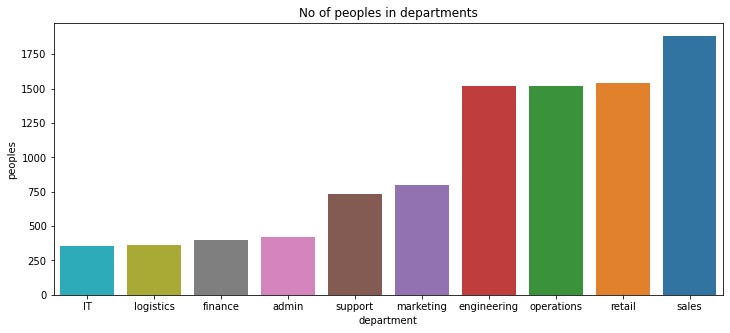

In [117]:
dept = df.department.value_counts()
plt.figure(figsize= (12,5))
sns.categorical.barplot(x = dept.keys(), y = dept.values).invert_xaxis()
plt.title("No of peoples in departments")
plt.xlabel("department")
plt.ylabel("peoples")
plt.show()

## let's see how many peoples are getting promoted in each department. 
> it might be possible that people are leaving because they are not getting promoted

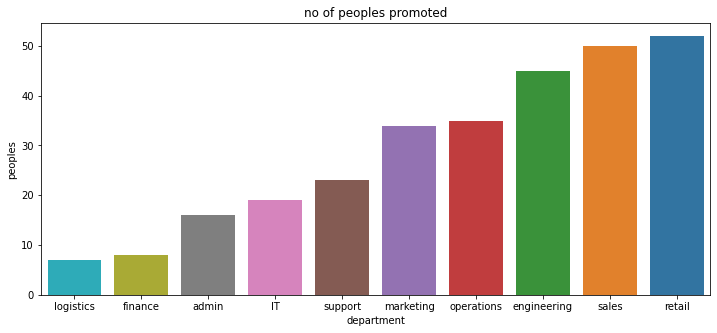

In [118]:
dept_promoted = df.query("promoted == 1")["department"]
import matplotlib.pylab as plt
plt.figure(figsize=(12,5))
sns.categorical.barplot(x = dept_promoted.unique(), y = dept_promoted.value_counts().values).invert_xaxis()
plt.title("no of peoples promoted")
plt.xlabel("department")
plt.ylabel("peoples")
plt.show()

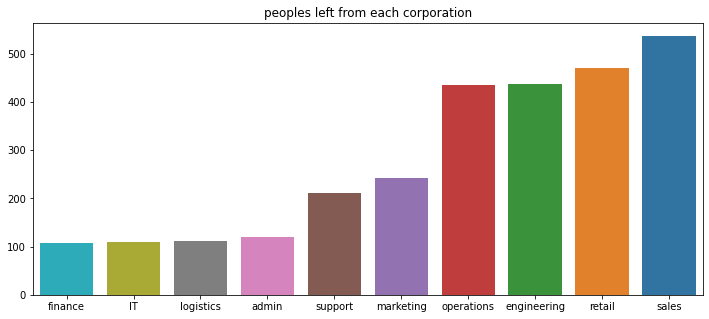

In [119]:
plt.figure(figsize=(12,5))
sns.categorical.barplot(df.query("left== 'yes'")['department'].value_counts().keys(),df.query("left== 'yes'")['department'].value_counts().values ).invert_xaxis()
plt.title("peoples left from each corporation")
plt.show()

## the above graph indicates that the most of the sales peoples are leaving ( they are more in number so our prediction might be quite biased '

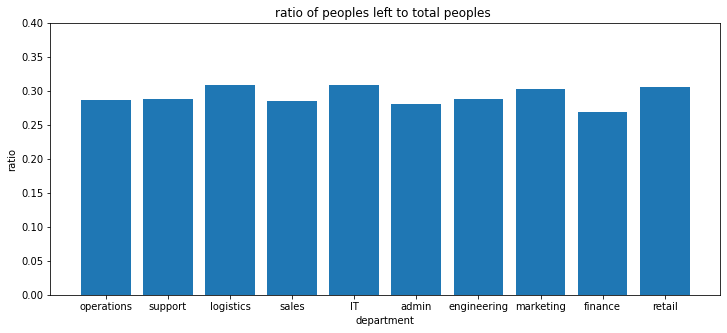

In [120]:
# plt.figure(figsize= (12,))
# what are the ratios of people left to total number of peoples in that department 

# findign the number of people left
dept_left = {}
dept_ratio = {}
for x in departments:
    dept_left[x] = len(df.query(f"department == '{x}' and left == 'yes'"))
    dept_ratio[x] = dept_left[x] / dept[x]

plt.figure(figsize= (12,5))
plt.bar(x = dept_ratio.keys(),height =  dept_ratio.values())
plt.ylim([0, 0.4])
plt.title("ratio of peoples left to total peoples ")
plt.xlabel("department")
plt.ylabel("ratio")
plt.show()

### What's the above graph indicating. 
the highest ratio is shown in logistics, IT, marketing and research. 

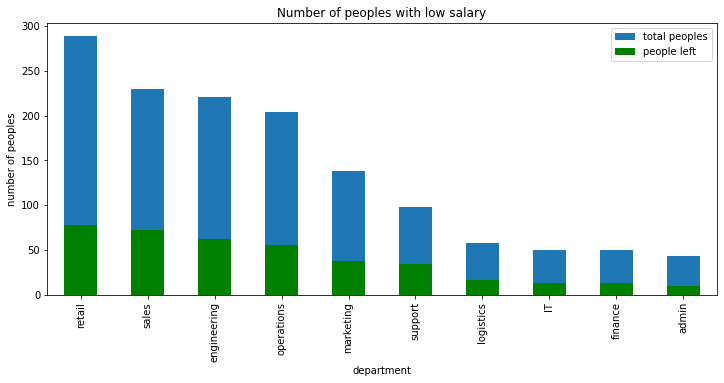

In [121]:
plt.figure(figsize= (12,5))
df.query("salary == 'low'")['department'].value_counts().plot(kind = 'bar')
plt.title("Number of peoples with low salary")
plt.xlabel("department")
plt.ylabel("number of peoples")
df.query("salary == 'low' and left == 'yes'" )['department'].value_counts().plot(kind ='bar', color= 'g' )
plt.legend(["total peoples","people left"])
plt.show()

### What's above graph indicating? 
the most number of peoples with low salary are in retail and most of them are leaving.

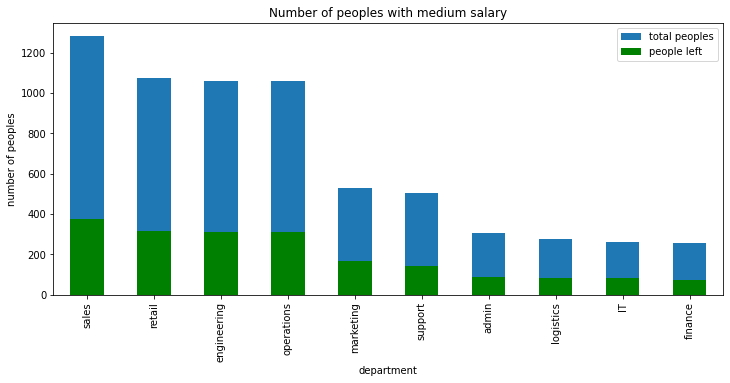

In [122]:
plt.figure(figsize= (12,5))
df.query("salary == 'medium'")['department'].value_counts().plot(kind = 'bar')
plt.title("Number of peoples with medium salary")
plt.xlabel("department")
plt.ylabel("number of peoples")
df.query("salary == 'medium' and left == 'yes'" )['department'].value_counts().plot(kind ='bar', color= 'g' )
plt.legend(["total peoples","people left"])
plt.show()

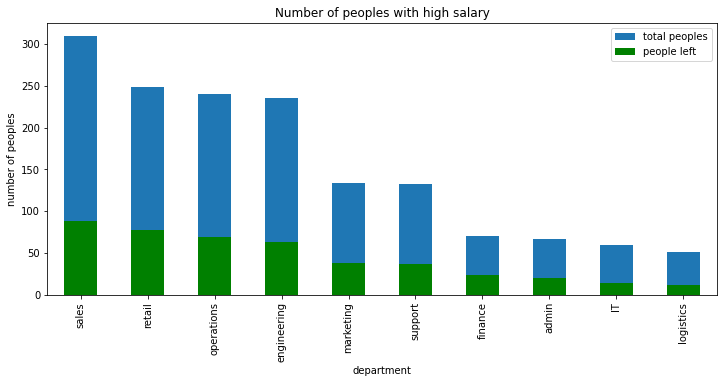

In [123]:
plt.figure(figsize= (12,5))
df.query("salary == 'high'")['department'].value_counts().plot(kind = 'bar')
plt.title("Number of peoples with high salary")
plt.xlabel("department")
plt.ylabel("number of peoples")
df.query("salary == 'high' and left == 'yes'" )['department'].value_counts().plot(kind ='bar', color= 'g' )
plt.legend(["total peoples","people left"])
plt.show()

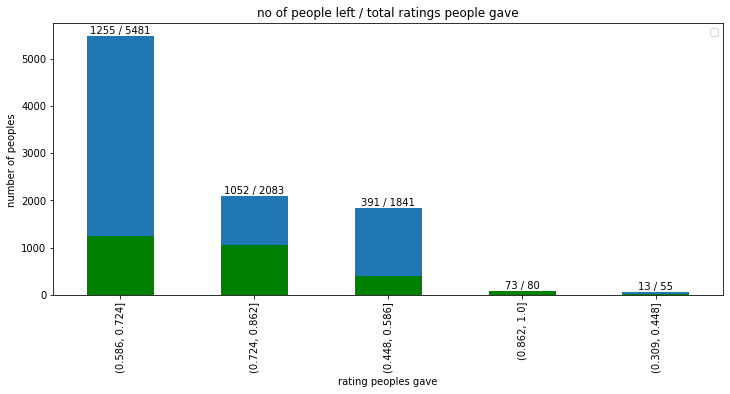

In [124]:
plt.figure(figsize =(12,5))
pd.cut(df.review,bins = 5).value_counts().plot(kind = 'bar')
ax = pd.concat([df.drop('review', axis = 1), pd.cut(df.review, bins = 5)], axis = 1 ).query("left == 'yes'").review.value_counts().plot(kind ='bar', color = 'g')
plt.legend("total_peoples", "people_left")

rects = ax.patches

# Make some labels.
labels = ["1255 / 5481" , "1052 / 2083", "391 / 1841",   "73 / 80",  "13 / 55"]#, , ,  , ,  ]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
plt.xlabel("rating peoples gave")
plt.ylabel("number of peoples ")
plt.title("no of people left / total ratings people gave")

plt.show()

## the above graph shows us that the 73 out of people in who gave rating 0.682 to 1.0 left 

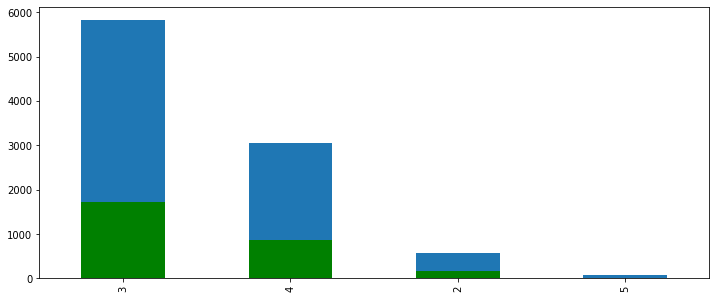

In [125]:
df.projects.value_counts().plot(kind = 'bar')
df.query("left=='yes'").projects.value_counts().plot(kind = 'bar', color = 'green')
# plt.ylim([0,500])
plt.show()

## the above graph indicates the no of peoples worked on project and in them how many left. 
### the most of the people worked on 3 proejcts and around 1900 peoples left 

<BarContainer object of 1 artists>

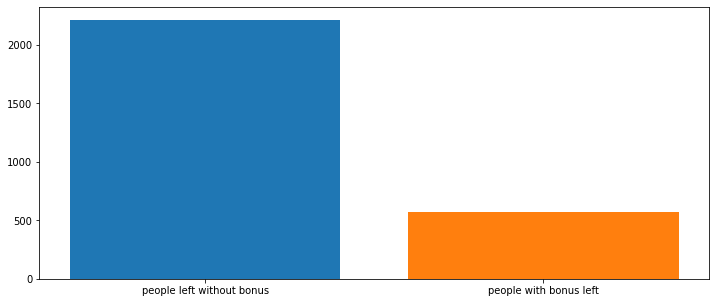

In [126]:
plt.bar(x= "people left without bonus",height = len(df.query("bonus == 0 and left == 'yes'")))
plt.bar(x = "people with bonus left" , height =  len(df.query("bonus == 1 and left == 'yes'"))) 

## the above graph indicat3es that the no of people wihtout bonus are leaving from company than peoples with bonus 
> it might be possible that the incentives and bonuses are good in keeping employees. 

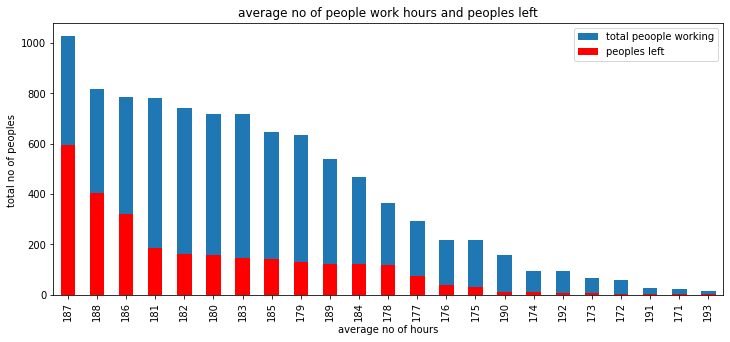

In [127]:


df.avg_hrs_month= df.avg_hrs_month.astype(int)
df.avg_hrs_month.value_counts().plot(kind = 'bar')
df.query("left == 'yes'").avg_hrs_month.value_counts().plot(kind = 'bar', color = 'red')
plt.title("average no of people work hours and peoples left")
plt.xlabel("average no of hours")
plt.ylabel("total no of peoples ")
plt.legend(["total peoople working" , "peoples left"])
plt.show()

## the above graph indicates that many peoples are working 186 hours and around 600 of them left the company 

# what suggestions can we give from above analysis? 

> the above analysis shows us that the number of peoples greately vary in each department 


> the above analysis also indicates that the peoples who got bonuses are less likely to leave the company 

> the above analysis shows that the people who got promotion are less likely to leave 